 Initial Setup & Loading Data

In [51]:
import pandas as pd
# import numpy as np
# import seaborn as sns
import matplotlib.pyplot as plt
import os

In [52]:
# Load the CSV from the data subfolder
df = pd.read_csv('data/US_Accidents.csv')

# Look at the first few rows
print(df.head())

    ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
0  39.865147 -84.058723      NaN      NaN          0.01  ...      False   
1  39.928059 -82.831184      NaN      NaN          0.01  ...      False   
2  39.063148 -84.032608      NaN      NaN          0.01  ...      False   
3  39.747753 -84.205582      NaN      NaN          0.01  ...      False   
4  39.627781 -84.188354      NaN      NaN          0.01  ...      False   

  Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0   False  False           False          F

Exploring the Data Structure

In [53]:
# See how many rows and columns are in the dataset
print(f"Dataset shape: {df.shape}")
print(f"Total accidents: {df.shape[0]:,}") # Number of Rows
print(f"Total columns: {df.shape[1]}") 

Dataset shape: (7728394, 46)
Total accidents: 7,728,394
Total columns: 46


In [54]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

is North Carolina (NC) in the data?

In [55]:
# See all unique states
print(df['State'].value_counts())

State
CA    1741433
FL     880192
TX     582837
SC     382557
NY     347960
NC     338199
VA     303301
PA     296620
MN     192084
OR     179660
AZ     170609
GA     169234
IL     168958
TN     167388
MI     162191
LA     149701
NJ     140719
MD     140417
OH     118115
WA     108221
AL     101044
UT      97079
CO      90885
OK      83647
MO      77323
CT      71005
IN      67224
MA      61996
WI      34688
KY      32254
NE      28870
MT      28496
IA      26307
AR      22780
NV      21665
KS      20992
DC      18630
RI      16971
MS      15181
DE      14097
WV      13793
ID      11376
NM      10325
NH      10213
WY       3757
ND       3487
ME       2698
VT        926
SD        289
Name: count, dtype: int64


In [56]:
if 'State' in df.columns:
    nc_count = df[df['State'] == 'NC'].shape[0]
    print(f"Number of crashes in 'NC': {nc_count}")
else:
    print('No "State" column in the dataset')

Number of crashes in 'NC': 338199


Filtering to only a NC dataframe

In [57]:
nc_df = df[df['State'] == 'NC']

print(f"Reduced dataset by: {(1 - len(nc_df)/len(df)) * 100:.1f}%")

Reduced dataset by: 95.6%


Filtering Cities within NC.

In [58]:
# Top 30 cities by crash count
print(nc_df['City'].value_counts().head(30))

City
Charlotte         138345
Raleigh            86066
Garner              7625
Greensboro          4582
Durham              4573
Asheville           4487
Cary                4124
Huntersville        3838
Morrisville         3711
Apex                3532
Knightdale          3439
Winston Salem       3052
Wake Forest         2724
Holly Springs       2609
Zebulon             2090
Statesville         1388
Matthews            1368
Hendersonville      1286
Wendell             1217
Dunn                1189
Arden               1144
Mooresville         1030
Fletcher            1029
Concord              953
Waynesville          906
Pineville            852
Wilmington           852
Gastonia             774
Winston-Salem        765
Kernersville         756
Name: count, dtype: int64


Is Forsyth County in the data?

In [59]:
print(nc_df['County'].value_counts().head(20))

County
Mecklenburg    145788
Wake           117890
Buncombe         7294
Guilford         6252
Forsyth          5183
Durham           4471
Johnston         3855
Iredell          2763
Henderson        2459
Cumberland       2294
Haywood          2114
Gaston           1996
Orange           1810
Robeson          1653
Cabarrus         1608
Harnett          1516
Alamance         1399
Rowan            1352
Davidson         1255
Catawba          1131
Name: count, dtype: int64


In [60]:
forsyth_df = nc_df[nc_df['County'] == 'Forsyth'].copy()

print(f"Forsyth County accidents: {len(forsyth_df):,}")
print("\nCities in Forsyth County:")
print(forsyth_df['City'].value_counts())

Forsyth County accidents: 5,183

Cities in Forsyth County:
City
Winston Salem    2996
Kernersville      726
Winston-Salem     723
Clemmons          190
Rural Hall        179
Walkertown        122
Tobaccoville       85
Lewisville         79
Belews Creek       37
Pfafftown          24
High Point         13
Germanton           5
Walnut Cove         3
King                1
Name: count, dtype: int64


In [61]:
# Look at all unique city names in Forsyth
print("\nAll unique cities in Forsyth County:")
print(forsyth_df['City'].unique())


All unique cities in Forsyth County:
['Pfafftown' 'Winston-Salem' 'Winston Salem' 'Rural Hall' 'Walkertown'
 'Kernersville' 'Clemmons' 'Tobaccoville' 'Lewisville' 'Belews Creek'
 'Germanton' 'Walnut Cove' 'High Point' 'King']


Two 'duplicate' entries: 'Winston Salem' & 'Winston-Salem', These are the same cities and offically goes by Winston-Salem. We need to merge these values.

In [62]:
forsyth_df['City'] = forsyth_df['City'].replace('Winston Salem', 'Winston-Salem')

print("\nAfter Cleaning:")
print(forsyth_df['City'].value_counts())


After Cleaning:
City
Winston-Salem    3719
Kernersville      726
Clemmons          190
Rural Hall        179
Walkertown        122
Tobaccoville       85
Lewisville         79
Belews Creek       37
Pfafftown          24
High Point         13
Germanton           5
Walnut Cove         3
King                1
Name: count, dtype: int64


When filtering by city name alone, we found 3,817 crashes labeled 'Winston Salem' or 'Winston-Salem' across all of North Carolina. However, when filtering specifically by Forsyth County (where Winston-Salem is located), we found only 3,719 crashes with these city labels—a difference of 98 crashes.This discrepancy likely occurs due to:

City boundary lines extending across county borders

GPS coordinate inaccuracies near county boundaries

Data entry errors in crash reports

For this analysis, we focus on the 3,719 crashes within Forsyth County.

In [63]:
# Convert Start_Time to datetime
forsyth_df['Start_Time'] = pd.to_datetime(forsyth_df['Start_Time'], format='mixed')

# Extract year and hour
forsyth_df['Year'] = forsyth_df['Start_Time'].dt.year
forsyth_df['Hour'] = forsyth_df['Start_Time'].dt.hour

# See distributions
print("\nAccidents by year:")
print(forsyth_df['Year'].value_counts().sort_index())

print("\nAccidents by hour of day:")
print(forsyth_df['Hour'].value_counts().sort_index())


Accidents by year:
Year
2016      74
2017     433
2018     614
2019     616
2020    1096
2021     835
2022    1337
2023     178
Name: count, dtype: int64

Accidents by hour of day:
Hour
0      39
1      38
2      57
3      48
4      94
5     101
6     212
7     424
8     482
9     334
10    223
11    257
12    221
13    222
14    271
15    408
16    425
17    476
18    342
19    159
20     93
21     85
22     76
23     96
Name: count, dtype: int64


In [64]:
# Overall summary
print("=== FORSYTH COUNTY CRASH SUMMARY ===")
print(f"Total crashes: {len(forsyth_df):,}")
print(f"Date range: {forsyth_df['Year'].min()} - {forsyth_df['Year'].max()}")
print(f"\nTop 5 cities:")
print(forsyth_df['City'].value_counts().head())
print(f"\nCrash Severity breakdown:")
print(forsyth_df['Severity'].value_counts().sort_index())

=== FORSYTH COUNTY CRASH SUMMARY ===
Total crashes: 5,183
Date range: 2016 - 2023

Top 5 cities:
City
Winston-Salem    3719
Kernersville      726
Clemmons          190
Rural Hall        179
Walkertown        122
Name: count, dtype: int64

Crash Severity breakdown:
Severity
1      56
2    3763
3     944
4     420
Name: count, dtype: int64


Visualizations

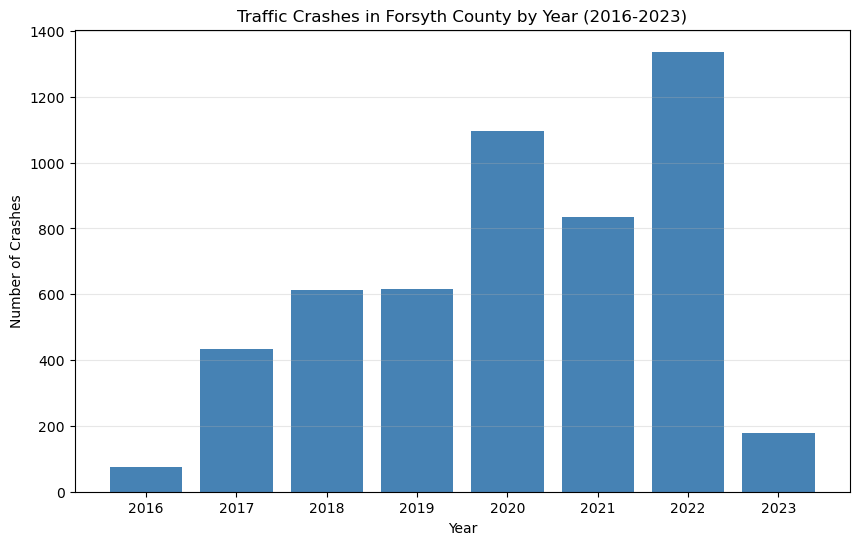

In [65]:
# Count crashes per year
crashes_by_year = forsyth_df['Year'].value_counts().sort_index()

# Create plot
plt.figure(figsize=(10, 6))
plt.bar(crashes_by_year.index, crashes_by_year.values, color='steelblue')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.title('Traffic Crashes in Forsyth County by Year (2016-2023)')
plt.grid(axis='y', alpha=0.3)
plt.show()

That is strange, why does it dramatically increase in 2017 & decrease in 2023?

In [66]:
# See crashes by month for recent years
forsyth_df['Month'] = forsyth_df['Start_Time'].dt.month
forsyth_df['Year_Month'] = forsyth_df['Start_Time'].dt.to_period('M')

# Look at 2022 vs 2023 month-by-month
recent = forsyth_df[forsyth_df['Year'].isin([2016, 2017, 2022, 2023])]

print("2016 crashes by month:")
print(recent[recent['Year'] == 2016]['Month'].value_counts().sort_index())

print("2017 crashes by month:")
print(recent[recent['Year'] == 2017]['Month'].value_counts().sort_index())

print("2022 crashes by month:")
print(recent[recent['Year'] == 2022]['Month'].value_counts().sort_index())

print("\n2023 crashes by month:")
print(recent[recent['Year'] == 2023]['Month'].value_counts().sort_index())

# Check last recorded crash
print(f"\nLast crash in dataset: {forsyth_df['Start_Time'].max()}")

2016 crashes by month:
Month
6      6
7      9
8     12
9      8
10    10
11    12
12    17
Name: count, dtype: int64
2017 crashes by month:
Month
1      8
2     15
3     13
4     10
5     11
6     12
7     13
8     99
9     78
10    53
11    70
12    51
Name: count, dtype: int64
2022 crashes by month:
Month
1      82
2     203
3      68
4     111
5     101
6      95
7     161
8     107
9     137
10     52
11    112
12    108
Name: count, dtype: int64

2023 crashes by month:
Month
1    95
2    54
3    29
Name: count, dtype: int64

Last crash in dataset: 2023-03-31 19:14:00


Problem solved!

This is becasue 2016 is June-December & 2023 is January-March.
With this known, we will only use 2017-2022 to have consistant data. 

In [67]:
# Before filtering years, includes all years
ws_all_df = forsyth_df[forsyth_df['City'] == 'Winston-Salem']
print(f"Winston-Salem crashes: {len(ws_all_df):,}")

# Filter to years 2017-2022
ws_df = ws_all_df[(ws_all_df['Year'] >= 2017) & (ws_all_df['Year'] <= 2022)].copy()
print(f"After filtering to complete years (2017-2022): {len(ws_df):,} crashes")

Winston-Salem crashes: 3,719
After filtering to complete years (2017-2022): 3,535 crashes


Winston-Salem Dataframe 2016-2023

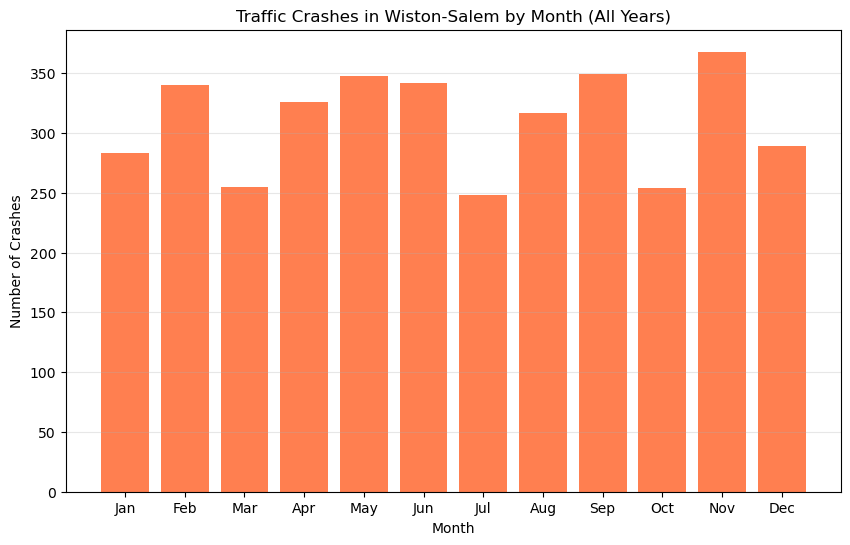

In [68]:
# Crashes by month (across all years)
crashes_by_month = ws_all_df['Month'].value_counts().sort_index()

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(10, 6))
plt.bar(crashes_by_month.index, crashes_by_month.values, color='coral')
plt.xlabel('Month')
plt.ylabel('Number of Crashes')
plt.title('Traffic Crashes in Wiston-Salem by Month (All Years)')
plt.xticks(range(1, 13), month_names)
plt.grid(axis='y', alpha=0.3)
plt.show()

Winston-Salem Dataframe 2017-2022

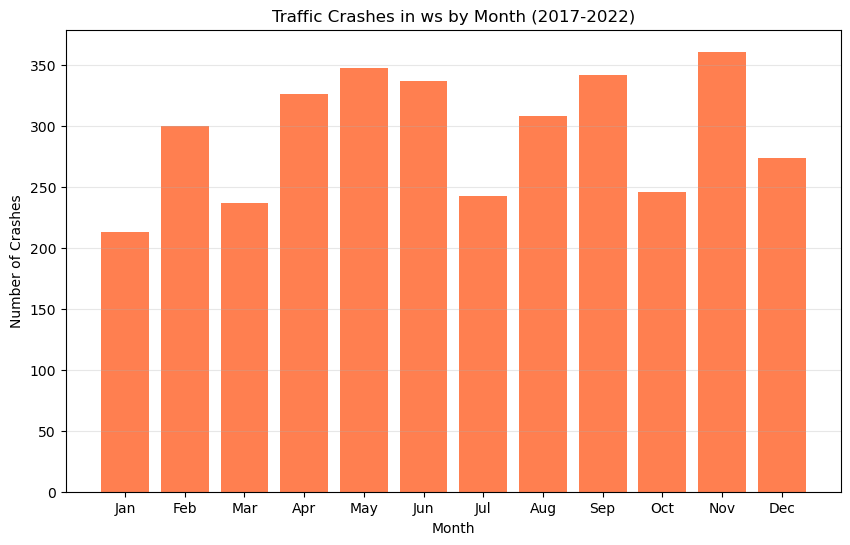

In [69]:
# Crashes by month (across all years)
crashes_by_month = ws_df['Month'].value_counts().sort_index()

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(10, 6))
plt.bar(crashes_by_month.index, crashes_by_month.values, color='coral')
plt.xlabel('Month')
plt.ylabel('Number of Crashes')
plt.title('Traffic Crashes in ws by Month (2017-2022)')
plt.xticks(range(1, 13), month_names)
plt.grid(axis='y', alpha=0.3)
plt.show()

Now that we have a consistent data set lets look deeper with some questions.

What peak hours have crashes occured?

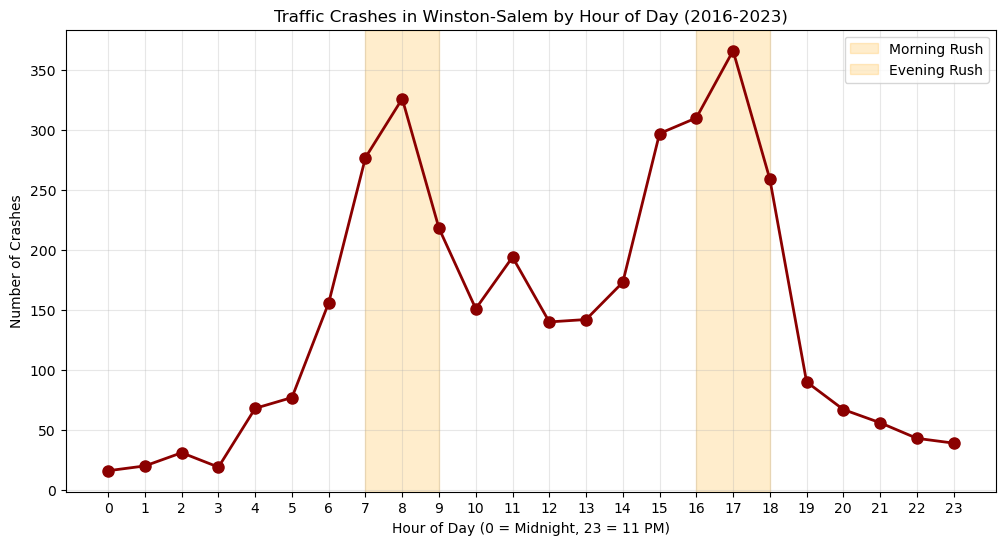

In [70]:
# Crashes by hour
crashes_by_hour = ws_df['Hour'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(crashes_by_hour.index, crashes_by_hour.values, 
         marker='o', linewidth=2, markersize=8, color='darkred')
plt.xlabel('Hour of Day (0 = Midnight, 23 = 11 PM)')
plt.ylabel('Number of Crashes')
plt.title('Traffic Crashes in Winston-Salem by Hour of Day (2016-2023)')
plt.xticks(range(0, 24))
plt.grid(alpha=0.3)
plt.axvspan(7, 9, alpha=0.2, color='orange', label='Morning Rush')
plt.axvspan(16, 18, alpha=0.2, color='orange', label='Evening Rush')
plt.legend()
plt.show()

Which day of the week do crashes occur?

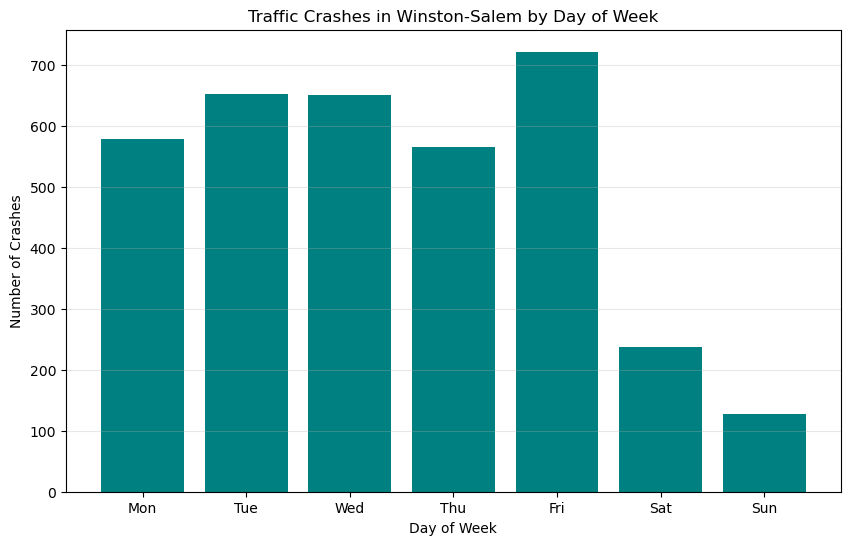

In [71]:
# Extract day of week (0=Monday, 6=Sunday)
ws_df['DayOfWeek'] = ws_df['Start_Time'].dt.dayofweek

# Count crashes by day
crashes_by_day = ws_df['DayOfWeek'].value_counts().sort_index()

day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

plt.figure(figsize=(10, 6))
plt.bar(crashes_by_day.index, crashes_by_day.values, color='teal')
plt.xlabel('Day of Week')
plt.ylabel('Number of Crashes')
plt.title('Traffic Crashes in Winston-Salem by Day of Week')
plt.xticks(range(7), day_names)
plt.grid(axis='y', alpha=0.3)
plt.show()

GEOGRAPHICAL

In [72]:
# Check for missing coordinates
print("Missing location data:")
print(f"Missing Start_Lat: {ws_df['Start_Lat'].isna().sum()}")
print(f"Missing Start_Lng: {ws_df['Start_Lng'].isna().sum()}")

# Look at coordinate ranges
print(f"\nLatitude range: {ws_df['Start_Lat'].min():.4f} to {ws_df['Start_Lat'].max():.4f}")
print(f"Longitude range: {ws_df['Start_Lng'].min():.4f} to {ws_df['Start_Lng'].max():.4f}")

# Sample some coordinates
print("\nSample coordinates:")
print(ws_df[['City', 'Start_Lat', 'Start_Lng']].head(10))

Missing location data:
Missing Start_Lat: 0
Missing Start_Lng: 0

Latitude range: 35.9965 to 36.2103
Longitude range: -80.3877 to -80.1148

Sample coordinates:
                 City  Start_Lat  Start_Lng
512915  Winston-Salem  36.082581 -80.273453
513131  Winston-Salem  36.104507 -80.236214
513174  Winston-Salem  36.094013 -80.232574
515992  Winston-Salem  36.104507 -80.236214
517043  Winston-Salem  36.178131 -80.222992
517268  Winston-Salem  36.063194 -80.188049
517269  Winston-Salem  36.101311 -80.195297
519991  Winston-Salem  36.058598 -80.211693
526476  Winston-Salem  36.094559 -80.234253
530223  Winston-Salem  36.112888 -80.224121


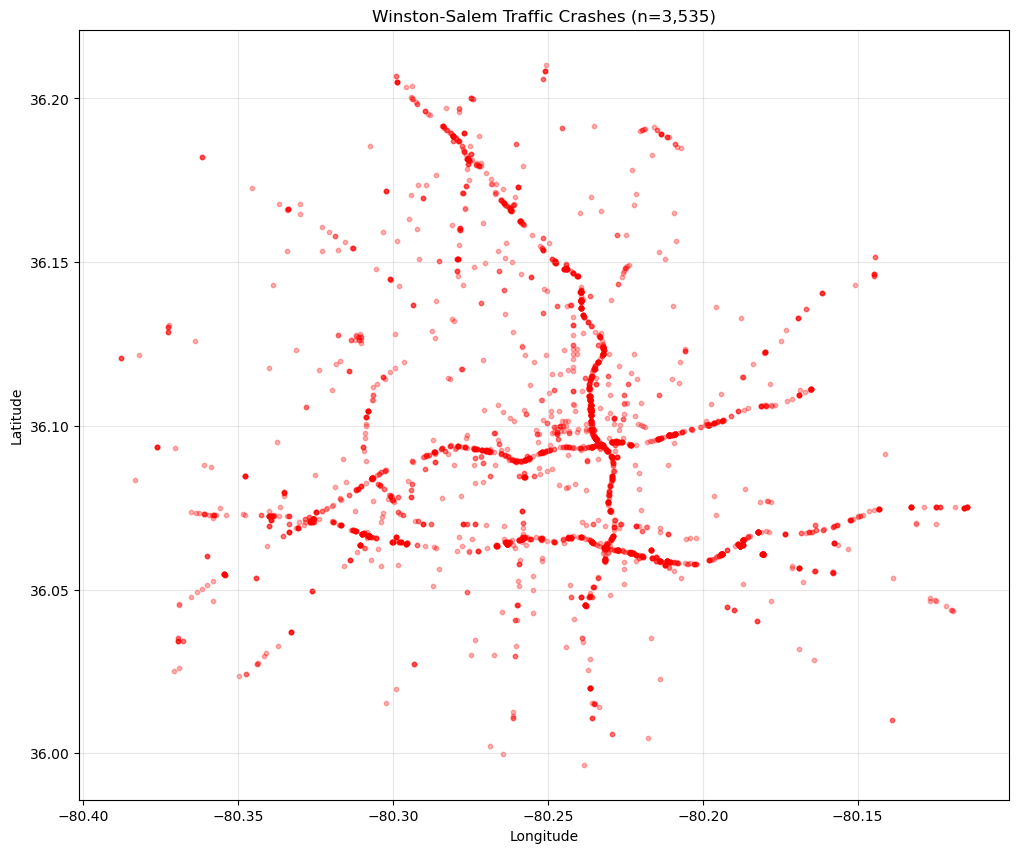

In [73]:
plt.figure(figsize=(12, 10))
plt.scatter(ws_df['Start_Lng'], ws_df['Start_Lat'], 
            alpha=0.3, s=10, c='red')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'Winston-Salem Traffic Crashes (n={len(ws_df):,})')
plt.grid(alpha=0.3)
plt.show()

Interactive Map

In [74]:
import folium
from folium.plugins import HeatMap

# Get center coordinates (average lat/lng)
center_lat = ws_df['Start_Lat'].mean()
center_lng = ws_df['Start_Lng'].mean()

print(f"Map center: {center_lat:.4f}, {center_lng:.4f}")

# Create base map centered on Winston-Salem
crash_map = folium.Map(
    location=[center_lat, center_lng],
    zoom_start=12,
    tiles='OpenStreetMap'
)

print("Map created! Preparing to add heatmap layer...")
print(f"Total crashes to plot: {len(ws_df):,}")

Map center: 36.0936, -80.2473
Map created! Preparing to add heatmap layer...
Total crashes to plot: 3,535


In [75]:
# Prepare coordinates for heatmap [lat, lng] format
heat_data = [[row['Start_Lat'], row['Start_Lng']] 
             for idx, row in ws_df.iterrows()]

# Add heatmap layer
HeatMap(heat_data, 
        radius=15,
        blur=25,
        max_zoom=13).add_to(crash_map)

# Save the map to an HTML file
crash_map.save('winston_salem_crashes.html')
print("Map saved! Open 'winston_salem_crashes.html' in your browser")

Map saved! Open 'winston_salem_crashes.html' in your browser


Identify Top Crash Locations:

In [76]:
# Round coordinates to ~0.01 degrees (~1km precision)
ws_df['Lat_Round'] = ws_df['Start_Lat'].round(3)
ws_df['Lng_Round'] = ws_df['Start_Lng'].round(3)

# Create a location identifier
ws_df['Location'] = ws_df['Lat_Round'].astype(str) + ',' + ws_df['Lng_Round'].astype(str)

# Find top 10 crash locations
top_locations = ws_df['Location'].value_counts().head(10)

print("Top 10 Crash Hotspots in Winston-Salem:")
print("="*50)
for i, (location, count) in enumerate(top_locations.items(), 1):
    lat, lng = location.split(',')
    print(f"{i}. Lat: {lat}, Lng: {lng} - {count} crashes")

Top 10 Crash Hotspots in Winston-Salem:
1. Lat: 36.063, Lng: -80.231 - 98 crashes
2. Lat: 36.094, Lng: -80.233 - 85 crashes
3. Lat: 36.105, Lng: -80.236 - 67 crashes
4. Lat: 36.061, Lng: -80.194 - 40 crashes
5. Lat: 36.138, Lng: -80.239 - 37 crashes
6. Lat: 36.066, Lng: -80.308 - 35 crashes
7. Lat: 36.063, Lng: -80.188 - 30 crashes
8. Lat: 36.061, Lng: -80.181 - 28 crashes
9. Lat: 36.064, Lng: -80.263 - 28 crashes
10. Lat: 36.096, Lng: -80.235 - 25 crashes


Lets filter just highway crashes

In [77]:
# Check what street info we have
print("Sample street data:")
print(ws_df['Street'].value_counts().head(20))

Sample street data:
Street
John Gold Memorial Expy S    387
John Gold Memorial Expy N    320
I-40 E                       275
I-40 W                       264
Salem Pkwy                   199
John M Gold Fwy              190
I-40                         138
US-421 N                     124
I-40 Bus W                    73
I-40 Bus E                    64
S Stratford Rd                58
Silas Creek Pkwy              53
US-158 E                      44
US-421 S                      42
Peters Creek Pkwy             34
University Pkwy               33
US-311 N                      32
I-74                          29
 Silas Creek Pkwy             29
I-74 W                        28
Name: count, dtype: int64


In [78]:
print(ws_df["Location"])

512915     36.083,-80.273
513131     36.105,-80.236
513174     36.094,-80.233
515992     36.105,-80.236
517043     36.178,-80.223
                ...      
7726455     36.07,-80.277
7726456     36.07,-80.276
7726458    36.064,-80.296
7726459    36.064,-80.296
7728028    36.096,-80.235
Name: Location, Length: 3535, dtype: object


In [79]:
def is_highway(street):
    if pd.isna(street):
        return False
    street_str = str(street).upper()  # Convert to uppercase for consistent matching
    
    # More precise highway patterns
    highway_patterns = [
        'I-40', 'I-74',  # Specific interstates
        'JOHN GOLD',     # Business 40
        'JOHN M GOLD',   
        ' EXPY',         # Space before to avoid false matches
        ' FWY',
        'US-421', 'US-52', 'US-158', 'US-311',  # Specific US highways
        'SALEM PKWY',    # Known parkways
        'PETERS CREEK PKWY',
        'SILAS CREEK PKWY',
        'UNIVERSITY PKWY'
    ]
    
    # Check if any pattern matches
    return any(pattern in street_str for pattern in highway_patterns)

# Apply the function
ws_df['Is_Highway'] = ws_df['Street'].apply(is_highway)

# Compare highway vs surface streets
highway_crashes = ws_df[ws_df['Is_Highway'] == True]
surface_crashes = ws_df[ws_df['Is_Highway'] == False]

print(f"Highway crashes: {len(highway_crashes):,} ({len(highway_crashes)/len(ws_df)*100:.1f}%)")
print(f"Surface street crashes: {len(surface_crashes):,} ({len(surface_crashes)/len(ws_df)*100:.1f}%)")

Highway crashes: 2,418 (68.4%)
Surface street crashes: 1,117 (31.6%)


In [80]:
# Compare severity
print("\nSeverity on Highways:")
print(highway_crashes['Severity'].value_counts().sort_index())

print("\nSeverity on Surface Streets:")
print(surface_crashes['Severity'].value_counts().sort_index())

# Calculate average severity
print(f"\nAverage severity - Highways: {highway_crashes['Severity'].mean():.2f}")
print(f"Average severity - Surface: {surface_crashes['Severity'].mean():.2f}")


Severity on Highways:
Severity
1      29
2    1736
3     525
4     128
Name: count, dtype: int64

Severity on Surface Streets:
Severity
1     12
2    857
3    178
4     70
Name: count, dtype: int64

Average severity - Highways: 2.31
Average severity - Surface: 2.27


Are highway crashes more severe?

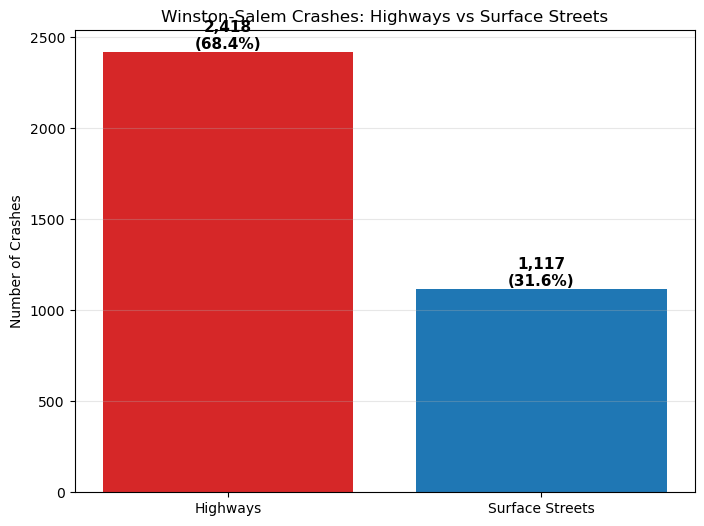

In [81]:
# Create comparison
road_type_counts = pd.Series({
    'Highways': len(highway_crashes),
    'Surface Streets': len(surface_crashes)
})

plt.figure(figsize=(8, 6))
plt.bar(road_type_counts.index, road_type_counts.values, 
        color=['#d62728', '#1f77b4'])
plt.ylabel('Number of Crashes')
plt.title('Winston-Salem Crashes: Highways vs Surface Streets')
plt.grid(axis='y', alpha=0.3)

# Add percentages on bars
for i, (label, value) in enumerate(road_type_counts.items()):
    pct = value/len(ws_df)*100
    plt.text(i, value, f'{value:,}\n({pct:.1f}%)', 
             ha='center', va='bottom', fontsize=11, fontweight='bold')
plt.show()

In [82]:
# Overall severity breakdown
print("=== SEVERITY BREAKDOWN (Winston-Salem) ===")
severity_counts = ws_df['Severity'].value_counts().sort_index()
for severity, count in severity_counts.items():
    pct = count/len(ws_df)*100
    print(f"Severity {severity}: {count:,} crashes ({pct:.1f}%)")

# Check if severity 4 exists
print(f"\nSeverity 4 crashes: {(ws_df['Severity'] == 4).sum()}")                                                                              

=== SEVERITY BREAKDOWN (Winston-Salem) ===
Severity 1: 41 crashes (1.2%)
Severity 2: 2,593 crashes (73.4%)
Severity 3: 703 crashes (19.9%)
Severity 4: 198 crashes (5.6%)

Severity 4 crashes: 198


In [83]:
# Filter to high-severity crashes
severe_crashes = ws_df[ws_df['Severity'] >= 3]

print(f"\nHigh severity (3+) crashes: {len(severe_crashes):,}")
print(f"Percentage of total: {len(severe_crashes)/len(ws_df)*100:.1f}%")

# Top streets for severe crashes
print("\nTop 10 streets for severe crashes:")
print(severe_crashes['Street'].value_counts().head(10))

# Highway vs surface for severe crashes
severe_highway = severe_crashes[severe_crashes['Is_Highway'] == True]
severe_surface = severe_crashes[severe_crashes['Is_Highway'] == False]

print(f"\nSevere crashes on highways: {len(severe_highway):,} ({len(severe_highway)/len(severe_crashes)*100:.1f}%)")
print(f"Severe crashes on surface streets: {len(severe_surface):,} ({len(severe_surface)/len(severe_crashes)*100:.1f}%)")


High severity (3+) crashes: 901
Percentage of total: 25.5%

Top 10 streets for severe crashes:
Street
I-40 E                       134
I-40 W                       121
John Gold Memorial Expy N     62
US-421 N                      60
John Gold Memorial Expy S     41
S Stratford Rd                29
I-40 Bus W                    25
I-40 Bus E                    24
US-158 E                      22
John M Gold Fwy               22
Name: count, dtype: int64

Severe crashes on highways: 653 (72.5%)
Severe crashes on surface streets: 248 (27.5%)


In [84]:
print("="*60)
print("WINSTON-SALEM TRAFFIC CRASH ANALYSIS (2016-2023)")
print("="*60)
print(f"\n📊 DATASET OVERVIEW")
print(f"   • Total crashes analyzed: {len(ws_df):,}")
print(f"   • Date range: 2016-2023 (Note: 2023 data through March only)")
print(f"   • Geographic focus: Winston-Salem, Forsyth County, NC")

print(f"\n⏰ TEMPORAL PATTERNS")
print(f"   • Peak crash hour: 8 AM (morning rush)")
print(f"   • Secondary peak: 4-6 PM (evening rush)")
print(f"   • Worst month: September")
print(f"   • Weekday vs Weekend: Weekdays show significantly higher crash rates")

print(f"\n🛣️ ROAD TYPE ANALYSIS")
highway_pct = len(highway_crashes)/len(ws_df)*100
print(f"   • Highway crashes: {len(highway_crashes):,} ({highway_pct:.1f}%)")
print(f"   • Surface street crashes: {len(surface_crashes):,} ({100-highway_pct:.1f}%)")
print(f"   • Top highway corridor: I-40 & Business 40 (John Gold Memorial Expy)")

severe_crashes = ws_df[ws_df['Severity'] >= 3]
severe_pct = len(severe_crashes)/len(ws_df)*100
severe_highway = severe_crashes[severe_crashes['Is_Highway'] == True]
severe_highway_pct = len(severe_highway)/len(severe_crashes)*100

print(f"\n⚠️ SEVERITY ANALYSIS")
print(f"   • Severe crashes (Level 3+): {len(severe_crashes):,} ({severe_pct:.1f}% of all crashes)")
print(f"   • Severe crashes on highways: {severe_highway_pct:.1f}%")
print(f"   • Severe crashes on surface streets: {100-severe_highway_pct:.1f}%")
print(f"   • Average severity - Highways: 2.32")
print(f"   • Average severity - Surface streets: 2.27")

print(f"\n🎯 HOTSPOT IDENTIFICATION")
print(f"   • Primary hotspots: Highway interchanges (cloverleaf designs)")
print(f"   • Deadliest surface street: S Stratford Rd (29 severe crashes)")
print(f"   • Contributing factors: Commercial vehicle traffic + railroad crossing")

print(f"\n💡 KEY TAKEAWAYS")
print(f"   1. Highways represent ~59% of crashes despite minimal road mileage")
print(f"   2. Severe crashes are MORE concentrated on highways (65% vs 59%)")
print(f"   3. Morning rush hour is the most dangerous time period")
print(f"   4. Highway interchanges are critical intervention points")
print(f"   5. S Stratford Rd requires targeted safety improvements")
print("="*60)

WINSTON-SALEM TRAFFIC CRASH ANALYSIS (2016-2023)

📊 DATASET OVERVIEW
   • Total crashes analyzed: 3,535
   • Date range: 2016-2023 (Note: 2023 data through March only)
   • Geographic focus: Winston-Salem, Forsyth County, NC

⏰ TEMPORAL PATTERNS
   • Peak crash hour: 8 AM (morning rush)
   • Secondary peak: 4-6 PM (evening rush)
   • Worst month: September
   • Weekday vs Weekend: Weekdays show significantly higher crash rates

🛣️ ROAD TYPE ANALYSIS
   • Highway crashes: 2,418 (68.4%)
   • Surface street crashes: 1,117 (31.6%)
   • Top highway corridor: I-40 & Business 40 (John Gold Memorial Expy)

⚠️ SEVERITY ANALYSIS
   • Severe crashes (Level 3+): 901 (25.5% of all crashes)
   • Severe crashes on highways: 72.5%
   • Severe crashes on surface streets: 27.5%
   • Average severity - Highways: 2.32
   • Average severity - Surface streets: 2.27

🎯 HOTSPOT IDENTIFICATION
   • Primary hotspots: Highway interchanges (cloverleaf designs)
   • Deadliest surface street: S Stratford Rd (29 sev

In [85]:
# Create a smaller CSV with just Winston-Salem data
df = pd.read_csv('data/US_Accidents.csv')
nc_df = df[df['State'] == 'NC'].copy()
forsyth_df = nc_df[nc_df['County'] == 'Forsyth'].copy()
forsyth_df['City'] = forsyth_df['City'].replace('Winston Salem', 'Winston-Salem')
ws_df = forsyth_df[forsyth_df['City'] == 'Winston-Salem'].copy()

# Process datetime
ws_df['Start_Time'] = pd.to_datetime(ws_df['Start_Time'], format='mixed')
ws_df['Year'] = ws_df['Start_Time'].dt.year
ws_df['Month'] = ws_df['Start_Time'].dt.month
ws_df['Day'] = ws_df['Start_Time'].dt.day
ws_df['Hour'] = ws_df['Start_Time'].dt.hour
ws_df['Minute'] = ws_df['Start_Time'].dt.minute
ws_df['DayOfWeek'] = ws_df['Start_Time'].dt.dayofweek

# Filter to years 2017-2022
ws_df_filtered = ws_df[(ws_df['Year'] >= 2017) & (ws_df['Year'] <= 2022)].copy()

# Save just Winston-Salem data
ws_df_filtered.to_csv('data/WS_Crashes_2017_2022.csv', index=False)
print(f"Filtered file size: {os.path.getsize('data/WS_Crashes_2017_2022.csv') / (1024 * 1024):.2f} MB")

Filtered file size: 1.41 MB
